### Cognitive Modeling (02458): Homework 1 - Part 2: Signal Detection Theory

---

_By Sebastian Sbirna (s190553) and Aleksander Frese (s163859)_

In [150]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Part 1: 

First in this exercise, for each of the three selected criterions $\lambda$: 

1. $\lambda$ is conservative and ~= __1.5__ 
2. $\lambda$ is lax and ~= __-0.5__
3. $\lambda$ is moderate and ~= __0.5__, 

we will simulate, 100 trials from an observer with __equal variance__ properties and $d' = 1$ (where $d' = \mu _s - \mu _n$). 

In total, this means that we will simulate 300 trials. Considering that each of the 3 experiments has 100 trials and we have two normal distributions to represent: the noise distribution and the signal distribution, we will collect 50 trials for each of the distributions, for each experiment.

In [79]:
trials_noise_set_1 = np.random.normal(0, 1, 50)
trials_noise_set_2 = np.random.normal(0, 1, 50)
trials_noise_set_3 = np.random.normal(0, 1, 50)

trials_signal_set_1 = np.random.normal(1, 1, 50)
trials_signal_set_2 = np.random.normal(1, 1, 50)
trials_signal_set_3 = np.random.normal(1, 1, 50)

The function below will convert an actual stimulus (or noise) to a percieved representation for an observer, depending on how his biased criterion makes decisions. 

We would expect that a lax observant will have much higher ___TPR___ and ___FPR___ than the conservative one, while the moderate observant should be closer to give median values for these two metrics.

In [80]:
def conversion(criterion, data_input):
    if (data_input >= criterion):
        return 1
    else:
        return 0

From here, we can find out how an observer has responded, in relation to the signal and noise presented to him, like so: depending on the criterion, if the stimulus intensity is higher than the observer's criterion, then they will respond with 'Yes' and we will record it as so. Otherwise, if the stimulus intensity is below the criterion value, we will record the response as a 'No'. That is why higher criterion levels (e.g. for conservative observers) will make the response to any stimulus value be less likely to be a 'Yes', as the threshold for responding 'Yes' has been set to a high value. The exact opposite happens for lower criterion levels (e.g. for lax observers).

In [81]:
lbda = 1.5

obs_response_signal_conservative = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_1]
obs_response_noise_conservative = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_1]

In [82]:
lbda = -0.5

obs_response_signal_lax = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_2]
obs_response_noise_lax = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_2]

In [83]:
lbda = 0.5

obs_response_signal_moderate = [conversion(lbda, signal_resp) for signal_resp in trials_signal_set_3]
obs_response_noise_moderate = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_3]

Having obtained the percieved values of the observer's response, we can immediately compute:
$$
P(FA) = \frac{N(1)_{noise}}{N_{noise}} \\
P(CR) = \frac{N(0)_{noise}}{N_{noise}} \\
P(Hit) = \frac{N(1)_{signal}}{N_{signal}} \\
P(Miss) = \frac{N(0)_{signal}}{N_{signal}} \\
$$

In [84]:
p_fa_conservative = sum(obs_response_noise_conservative) / len(trials_noise_set_1)
p_cr_conservative = 1 - p_fa_conservative
p_hit_conservative = sum(obs_response_signal_conservative) / len(trials_signal_set_1)
p_miss_conservative = 1 - p_hit_conservative

In [85]:
p_fa_lax = sum(obs_response_noise_lax) / len(trials_noise_set_2)
p_cr_lax = 1 - p_fa_lax
p_hit_lax = sum(obs_response_signal_lax) / len(trials_signal_set_2)
p_miss_lax = 1 - p_hit_lax

In [86]:
p_fa_moderate = sum(obs_response_noise_moderate) / len(trials_noise_set_3)
p_cr_moderate = 1 - p_fa_moderate
p_hit_moderate = sum(obs_response_signal_moderate) / len(trials_signal_set_3)
p_miss_moderate = 1 - p_hit_moderate

Since we have computed $P(Hit)$ and $P(FA)$, we may now compute $d'$ for each of the three experiments, knowing that $\phi(\lambda)$ = cdf($\lambda$). 

Therefore, $\phi^{-1}(P) = ppf(P)$, where PPF is the __Percent Point Function__.

In [87]:
import scipy.stats as stats

est_d_prime_conservative = stats.norm.ppf(p_hit_conservative) - stats.norm.ppf(p_fa_conservative)
est_d_prime_lax = stats.norm.ppf(p_hit_lax) - stats.norm.ppf(p_fa_lax)
est_d_prime_moderate = stats.norm.ppf(p_hit_moderate) - stats.norm.ppf(p_fa_moderate)

Let us check and see if we have received the correct $d'$ for each of these three experiments. We should automatically get a $d'$ = 1, since that is how we set the difference of means between the noise distibution ($\mu = 0$) and the signal distribution ($\mu = 1$) at the beginning of the exercise.

In [88]:
print("d' for conservative observer is: " + str(est_d_prime_conservative) + ' (should be 1.00)')
print("d' for lax observer is: " + str(est_d_prime_lax) + ' (should be 1.00)')
print("d' for moderate observer is: " + str(est_d_prime_moderate) + ' (should be 1.00)')

d' for conservative observer is: 1.5860501115173147 (should be 1.00)
d' for lax observer is: 0.8222300530384167 (should be 1.00)
d' for moderate observer is: 1.1110442045074251 (should be 1.00)


As we could have expected, since we are dealing with experimental estimates, we can see that none of our 3 experiments lead to the correct value of $d'$, however the moderate criterion observer is the closest to the actual value of all the three observers.

### Part 2:

Now we need to plot the __Gaussian__ ROC curve for the three experiments. We know that this curve will be a straight line due to plotting it in the Gaussian coordinate system. For an ___equal variance___ between signal and noise distibutions, the line will be making a 45$^{\circ}$ angle when intersecting the __Ox__ and __Oy__ axes, and __our line slope will be equal to 1__.

The line is determined by the inverse of the __cdf__ function upon the probabilities $P(FA)$ and $P(Hit)$. Therefore, if we have __P(FA)__ and __P(Hit)__ for each of our three experiments, we can plot a regression line through them, so that the SSE is minimal. This set of 2 probabilities is all we need to determine the ROC Gaussian line of fit.

---

Below, we will concatenate the probability results of the three functions, so that P(FA) will be on the first column and P(Hit) will be on the second column. We need this, since __P(FA) will correspond to our X values__ and __P(Hit) will be our Y values.__

In [89]:
results_conservative = np.array([stats.norm.ppf(p_fa_conservative), stats.norm.ppf(p_hit_conservative)])
results_lax = np.array([stats.norm.ppf(p_fa_lax), stats.norm.ppf(p_hit_lax)])
results_moderate = np.array([stats.norm.ppf(p_fa_moderate), stats.norm.ppf(p_hit_moderate)])

results_experiments = np.append([results_conservative], [results_lax], axis = 0)
results_experiments = np.append(results_experiments, [results_moderate], axis = 0)

print(results_experiments)

[[-2.05374891 -0.4676988 ]
 [ 0.58284151  1.40507156]
 [-0.4676988   0.64334541]]


In [90]:
x = results_experiments[:,0]
y = results_experiments[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

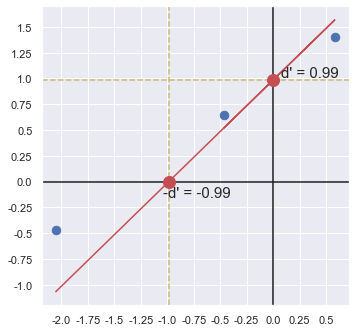

In [111]:
slope = 1 
fig = plt.figure(figsize = [5.5, 5.5])
ax = fig.add_subplot(1, 1, 1)
ax.grid(True, which='both')

ax.axhline(y=0, color='k') # this gives the Oy axis
ax.axvline(x=0, color='k') # this gives the Ox axis

ax.axhline(intercept, color = 'y', linestyle = '--'); # marking the Oy intersection point (d')
ax.axvline(-intercept/slope, color = 'y', linestyle = '--'); # marking the Ox intersection point (-d')

plt.plot(x, y, 'o', markersize = 8.5) # Plot original data
plt.plot(x, slope * x + intercept, 'r') # Plot the fitted line

plt.xticks(np.arange(-2.5, 2.0, 0.25), np.arange(-2.5, 2.0, 0.25)) # redefine Ox axis values for better readability
plt.yticks(np.arange(-1.5, 2.0, 0.25), np.arange(-1.5, 2.0, 0.25)) # redefine Oy axis values for better readability

plt.plot(0, intercept, 'r', marker = 'o', fillstyle = 'full', markersize = 12) # Make the Oy marker point more visible
plt.plot(-intercept/slope, 0, 'r', marker = 'o', fillstyle = 'full', markersize = 12) # Make the Ox marker point more visible

plt.text(x = 0.35, y = intercept + 0.025, s = 'd\' = %.2f' % (intercept), horizontalalignment='center', fontsize=15); # Write the value of d' according to the Oy intersection
plt.text(x = (-intercept/slope) + 0.26, y = -0.15 , s = '-d\' = %.2f' % (-intercept/slope), horizontalalignment='center', fontsize=15); # Write the value of -d' according to the Ox intersection

As we can observe from the calculations upon the Gaussian ROC model above, the estimated value of $d' = 0.99$ are reasonably close to the expected value of $d' = 1$ for an equal variance observer, taken with a small error margin.

### Part 3:

In this last part, we will simulate the same number of stimulus-vs-noise experiments as before, but this time with changing the distribution properties of the signal, so that the mean is now higher ($\mu_s = 2$, $\mu_n = 0$) and the variance is now different than that of the noise distribution ($\sigma_s = 1.5$, $\sigma_n = 1$).

This creates strong implications: we may no longer assume that our sensitivity measure $d'$ is equal to the difference between $\mu_s - \mu_n$. The formula right now needs to take into consideration the $\mu_s$ and $\sigma_s$ within the new signal distribution. Originally, we have set this values to be 2 and 1.5, respectively, however we understand that the generated random sample for the signal will not have exactly this mean and std. Therefore, we need to treat $\mu$ and $\sigma$ as unknowns, and compute them from the formula:
$$\phi^{-1}(P(Hit)) = \frac{1}{\sigma_s}\phi^{-1}(P(FA)) + \frac{\mu_s}{\sigma_s}$$

This is a linear equation of the form: $ y = ax + b$, where we can compute (exactly like previously): $y = \phi^{-1}(P(Hit))$ and $x = \phi^{-1}(P(FA))$. 

From there, we will find the unknowns $\sigma_s$ and $\mu_s$, knowing that $a = \frac{1}{\sigma_s}$ and $b = \frac{\mu_s}{\sigma_s}$. 

---

The following steps will first verify what would be the result of $d'$ if we wouldn't know that the data comes from an unequal variance observer.

The calculations are done exactly as in the previous part.

In [151]:
trials_noise_set_new_1 = np.random.normal(0, 1, 50)
trials_noise_set_new_2 = np.random.normal(0, 1, 50)
trials_noise_set_new_3 = np.random.normal(0, 1, 50)

trials_ueq_signal_set_1 = np.random.normal(2, 1.5, 50)
trials_ueq_signal_set_2 = np.random.normal(2, 1.5, 50)
trials_ueq_signal_set_3 = np.random.normal(2, 1.5, 50)

In [152]:
lbda = 1.5

ueq_obs_response_signal_conservative = [conversion(lbda, signal_resp) for signal_resp in trials_ueq_signal_set_1]
ueq_obs_response_noise_conservative = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_new_1]

In [153]:
lbda = -0.5

ueq_obs_response_signal_lax = [conversion(lbda, signal_resp) for signal_resp in trials_ueq_signal_set_2]
ueq_obs_response_noise_lax = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_new_2]

In [154]:
lbda = 0.5

ueq_obs_response_signal_moderate = [conversion(lbda, signal_resp) for signal_resp in trials_ueq_signal_set_3]
ueq_obs_response_noise_moderate = [conversion(lbda, noise_resp) for noise_resp in trials_noise_set_new_3]

In [155]:
ueq_p_fa_conservative = sum(ueq_obs_response_noise_conservative) / len(trials_noise_set_new_1)
ueq_p_cr_conservative = 1 - ueq_p_fa_conservative
ueq_p_hit_conservative = sum(ueq_obs_response_signal_conservative) / len(trials_ueq_signal_set_1)
ueq_p_miss_conservative = 1 - ueq_p_hit_conservative

In [156]:
ueq_p_fa_lax = sum(ueq_obs_response_noise_lax) / len(trials_noise_set_new_2)
ueq_p_cr_lax = 1 - ueq_p_fa_lax
ueq_p_hit_lax = sum(ueq_obs_response_signal_lax) / len(trials_ueq_signal_set_2)
ueq_p_miss_lax = 1 - ueq_p_hit_lax

In [157]:
ueq_p_fa_moderate = sum(ueq_obs_response_noise_moderate) / len(trials_noise_set_new_3)
ueq_p_cr_moderate = 1 - ueq_p_fa_moderate
ueq_p_hit_moderate = sum(ueq_obs_response_signal_moderate) / len(trials_ueq_signal_set_3)
ueq_p_miss_moderate = 1 - ueq_p_hit_moderate

In [158]:
import scipy.stats as stats

new_est_d_prime_conservative = stats.norm.ppf(ueq_p_hit_conservative) - stats.norm.ppf(ueq_p_fa_conservative)
new_est_d_prime_lax = stats.norm.ppf(ueq_p_hit_lax) - stats.norm.ppf(ueq_p_fa_lax)
new_est_d_prime_moderate = stats.norm.ppf(ueq_p_hit_moderate) - stats.norm.ppf(ueq_p_fa_moderate)

In [159]:
print("d' for conservative observer is: " + str(new_est_d_prime_conservative) + ' (should have been 1.00 if the signal-noise curves had equal variance)')
print("d' for lax observer is: " + str(new_est_d_prime_lax) + ' (should have been 1.00 if the signal-noise curves had equal variance)')
print("d' for moderate observer is: " + str(new_est_d_prime_moderate) + ' (should have been 1.00 if the signal-noise curves had equal variance)')

d' for conservative observer is: 2.022472393711362 (should have been 1.00 if the signal-noise curves had equal variance)
d' for lax observer is: 1.3922272780009755 (should have been 1.00 if the signal-noise curves had equal variance)
d' for moderate observer is: 1.2208458759422112 (should have been 1.00 if the signal-noise curves had equal variance)


As we can see here, the $d'$ values received are much more further off the assumed difference of 1.00 (if the observer would have had equal variance distributions).

Therefore, we can figure that such results for the sensivity variable are wrong, and we should not work with them.

---
Now, we will compute the actual unequal variance-related d' parameter, using the matrix $Y$ where we put the three found values of $\phi^{-1}(P(Hit))$, the matrix $X$ where we have, as first column, the values of $\phi^{-1}(P(FA))$, and a second column of ones for the intercept (since the intercept is always a constant). We will want to compute the matrix $\beta$, where we understand that $ \beta= \left[ {\begin{array}{c} slope(a) \\ intercept(b) \\ \end{array} } \right]$.

To perform the computation of finding $\beta$ from the formula $Y = X * \beta$, we will use the pseudoinverse of the matrix $X$, i.e. $X^{-1}$. 

Therefore: $X^{-1} * Y (= X^{-1} * X * \beta) = \beta$

In [160]:
results_experiments_new = np.array((stats.norm.ppf(ueq_p_fa_conservative), stats.norm.ppf(ueq_p_fa_lax), stats.norm.ppf(ueq_p_fa_moderate))).reshape(3, 1)

X = np.concatenate((results_experiments_new, np.ones((3, 1))), axis = 1)
X

array([[-1.55477359,  1.        ],
       [ 0.35845879,  1.        ],
       [-0.30548079,  1.        ]])

In [161]:
Y = np.array((stats.norm.ppf(ueq_p_hit_conservative), stats.norm.ppf(ueq_p_hit_lax), stats.norm.ppf(ueq_p_hit_moderate))).reshape(3, 1)
Y

array([[0.4676988 ],
       [1.75068607],
       [0.91536509]])

The pseudoinverse of the matrix $X$ may be obtained in the following way:

In [162]:
np.linalg.pinv(X)

array([[-0.55855203,  0.45516938,  0.10338265],
       [ 0.05372301,  0.56119046,  0.38508654]])

By multiplying the pseudoinverse of X ($X^{-1}$) with the matrix Y, we may obtain the matrix $\beta$ and the results for the slope $a$ and the intercept $b$.

In [163]:
a, b = np.dot(np.linalg.pinv(X), Y)
np.dot(np.linalg.pinv(X), Y)

array([[0.63025745],
       [1.36008927]])

If we now have found $a$, we have simultaneously found $\sigma_s$. 

To compute $\mu_s$, we just need to plug in $\sigma_s$ into the equation for $b$ (whose value has just been found from the $\beta$ matrix).

In [164]:
sigma_s = 1/a
print(sigma_s)

[1.5866532]


In [165]:
mu_s = b * sigma_s
print(str(mu_s))

[2.15799]


As we can see above, we have successfully approximately recovered our $\mu_s = 2.15$  (originally equal to 2.00) and $\sigma_s = 1.58$ (originally equal to 1.5). 

This means that the sensitivity of the observer has now been successfully recorded and the criterion biases are now accounted for.

In [166]:
ueq_results_conservative = np.array([stats.norm.ppf(ueq_p_fa_conservative), stats.norm.ppf(ueq_p_hit_conservative)])
ueq_results_lax = np.array([stats.norm.ppf(ueq_p_fa_lax), stats.norm.ppf(ueq_p_hit_lax)])
ueq_results_moderate = np.array([stats.norm.ppf(ueq_p_fa_moderate), stats.norm.ppf(ueq_p_hit_moderate)])

ueq_results_experiments = np.append([ueq_results_conservative], [ueq_results_lax], axis = 0)
ueq_results_experiments = np.append(ueq_results_experiments, [ueq_results_moderate], axis = 0)

print(ueq_results_experiments)

[[-1.55477359  0.4676988 ]
 [ 0.35845879  1.75068607]
 [-0.30548079  0.91536509]]


In [167]:
x = ueq_results_experiments[:,0]
y = ueq_results_experiments[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

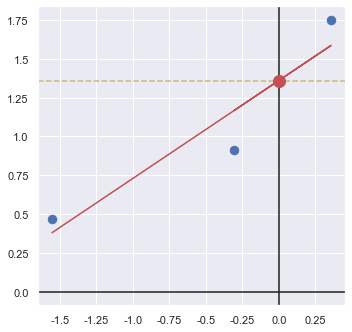

In [177]:
fig = plt.figure(figsize = [5.5, 5.5])
ax = fig.add_subplot(1, 1, 1)
ax.grid(True, which='both')

ax.axhline(y=0, color='k') # this gives the Oy axis
ax.axvline(x=0, color='k') # this gives the Ox axis

ax.axhline(intercept, color = 'y', linestyle = '--'); # marking the Oy intersection point (d')

plt.plot(x, y, 'o', markersize = 8.5) # Plot original data
plt.plot(x, slope * x + intercept, 'r') # Plot the fitted line

plt.xticks(np.arange(-2.5, 2.0, 0.25), np.arange(-2.5, 2.0, 0.25)) # redefine Ox axis values for better readability
plt.yticks(np.arange(-1.5, 2.0, 0.25), np.arange(-1.5, 2.0, 0.25)) # redefine Oy axis values for better readability

plt.plot(0, intercept, 'r', marker = 'o', fillstyle = 'full', markersize = 12); # Make the Oy marker point more visible

As we can observe from the picture and calculations above, the intersection of a Gaussian ROC curve with the axes of coordinates, for an unequal variance observer, is not giving off a 45°–45°–90° triangle anymore, due to the necessary considerations for $\mu_s$ and $\sigma_s$ in the model. 